# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [6]:
# Initialize the random number generator
import random
random.seed(0)
import pandas as pd
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
import io

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [2]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
uploaded = files.upload()

Saving prices.csv to prices.csv


In [ ]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/My Drive/')

In [7]:
#loading the data
df = pd.read_csv(io.StringIO(uploaded['prices.csv'].decode('utf-8')))

## Question 2

### Drop null
- Drop null values if any

In [8]:
#checking the shape
df.shape

(851264, 7)

In [9]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [10]:
#checking is there is any null
df.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [11]:
#priting the data
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [13]:
#droppign the columns
newstockdf = df.drop(['date','volume','symbol'],axis =1 )

## Question 3

### Print the dataframe
- print the modified dataframe

In [15]:
#printing the modified data
newstockdf.tail()

,open,close,low,high
851259,103.309998,103.199997,102.849998,103.930000
851260,43.070000,43.040001,42.689999,43.310001
851261,53.639999,53.529999,53.270000,53.740002
851262,44.730000,45.450001,44.410000,45.590000
851263,54.200001,53.630001,53.389999,54.480000


In [14]:
newstockdf.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [16]:
#forming train and test data
X = newstockdf[['open','low','high']]
y= newstockdf[['close']]


## Question 4

### Create train and test sets
- Split the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization,Flatten
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import keras

Using TensorFlow backend.


In [19]:
#doing train test split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [27]:
#scaling the data
sc = StandardScaler()
X_trainsc = sc.fit_transform(X_train)
X_testsc = sc.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [28]:
#converting feature into numpy array
y_train = np.array(y_train)


In [39]:
y_test = np.array(y_test)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [120]:
#intializing the model
model = tf.keras.Sequential()

In [121]:
model.add(tf.keras.layers.Flatten(input_shape=(3,)))
model.add(tf.keras.layers.Dense(1, activation='linear'))

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [122]:
model.compile(optimizer='sgd',loss=tf.keras.losses.MeanSquaredError())


## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [123]:
#fitting the model with 50 epochs and batch_size 128
output = model.fit(X_trainsc, y_train , validation_data= (X_testsc, y_test), epochs = 50,batch_size=128)

Epoch 1/50
5321/5321 [==============================] - 14s 3ms/step - loss: 36.1073 - val_loss: 1.0744
Epoch 2/50
5321/5321 [==============================] - 15s 3ms/step - loss: 0.9631 - val_loss: 0.9971
Epoch 3/50
5321/5321 [==============================] - 15s 3ms/step - loss: 0.9559 - val_loss: 1.0065
Epoch 4/50
5321/5321 [==============================] - 15s 3ms/step - loss: 0.9472 - val_loss: 0.9839
Epoch 5/50
5321/5321 [==============================] - 15s 3ms/step - loss: 0.9400 - val_loss: 0.9921
Epoch 6/50
5321/5321 [==============================] - 14s 3ms/step - loss: 0.9314 - val_loss: 0.9744
Epoch 7/50
5321/5321 [==============================] - 14s 3ms/step - loss: 0.9254 - val_loss: 0.9777
Epoch 8/50
5321/5321 [==============================] - 14s 3ms/step - loss: 0.9169 - val_loss: 0.9696
Epoch 9/50
5321/5321 [==============================] - 15s 3ms/step - loss: 0.9098 - val_loss: 0.9432
Epoch 10/50
5321/5321 [==============================] - 15s 3ms/step - 

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [124]:
#evaluating the model
trainloss = model.evaluate(X_trainsc, y_train, verbose=0)
trainloss

0.6943287253379822

In [125]:
testloss = model.evaluate(X_testsc, y_test, verbose=0)
testloss

0.7311927676200867

Text(0, 0.5, 'error')

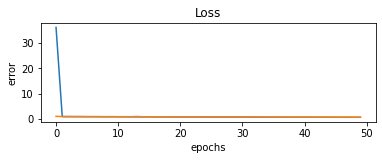

In [152]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output.history['loss'], label='train')
pyplot.plot(output.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [127]:
#predicting the test data
prediction = model.predict(X_testsc) 
print(prediction.flatten()) 
print(y_test)

[ 40.310207 293.03973   70.77762  ...  45.659233  61.27362   33.33824 ]
[[ 40.02    ]
 [292.440002]
 [ 71.589996]
 ...
 [ 45.639999]
 [ 61.990002]
 [ 33.25    ]]


In [65]:
maninput = np.array([[123.430000, 122.30999, 116.250000]])

In [128]:
#withoutscaling the data for manual prediction
model.predict(maninput)
#sc.transform(maninput)

array([[10077.31]], dtype=float32)

In [129]:
#scaling as we have trained data with scaling
maninputsc = sc.transform(maninput)

In [130]:
model.predict(maninputsc)

array([[119.82937]], dtype=float32)

In [131]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [84]:
#collecting fashion_mnist data
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()
print('The training features data shape is',trainX.shape)

The training features data shape is (60000, 28, 28)


In [85]:
print('The testing features data shape is',testX.shape)
print(trainY[0:10])

The testing features data shape is (10000, 28, 28)
[9 0 0 3 0 2 7 2 5 5]


### Change train and test labels into one-hot vectors

In [86]:
#converting into one hot vectors
trainYn = tf.keras.utils.to_categorical(trainY)

In [87]:
testYn = tf.keras.utils.to_categorical(testY)

In [88]:
print(trainYn.shape)
print('First 5 examples now are: ', trainYn[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [89]:
print(testYn.shape)


(10000, 10)


In [90]:
print(trainYn.shape)


(60000, 10)


In [82]:
print(testY[0:10])#scaling the data between 0 to 1
trainX = trainX/255.0
testX = testX/255.0

[9 2 1 1 6 1 4 6 5 7]


### Build the Graph

### Initialize model, reshape & normalize data

In [156]:
#intializing the model
model1  = tf.keras.Sequential()

In [157]:
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model1.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [158]:
#including hidden and dropout layers
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Dense(100, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [159]:
#using softmax activation function and optimizer as adam and loss function as categorical crossentropy
model1.add(tf.keras.layers.Dense(10, activation='softmax'))


In [160]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [161]:
output1 = model1.fit(trainX,trainYn,validation_data=(testX, testYn),epochs=50,batch_size=120)

Epoch 1/50
500/500 [==============================] - 2s 4ms/step - loss: 0.5660 - accuracy: 0.8000 - val_loss: 0.4017 - val_accuracy: 0.8534
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.4149 - accuracy: 0.8494 - val_loss: 0.3699 - val_accuracy: 0.8639
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3718 - accuracy: 0.8647 - val_loss: 0.3668 - val_accuracy: 0.8672
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3526 - accuracy: 0.8719 - val_loss: 0.3491 - val_accuracy: 0.8727
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3336 - accuracy: 0.8769 - val_loss: 0.3315 - val_accuracy: 0.8779
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3155 - accuracy: 0.8837 - val_loss: 0.3281 - val_accuracy: 0.8807
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3058 - accuracy: 0.8852 - val_loss: 0.3321 - val_accuracy: 0.8800
Epoch 

In [162]:
trainloss, trainaccuracy = model1.evaluate(trainX, trainYn, verbose=0)
testloss,testaccuracy = model1.evaluate(testX, testYn, verbose=0)


In [163]:
print('Train: %.3f, Test: %.3f loss' % (trainloss, testloss))
print('Train: %.3f, Test: %.3f Accuracy' % (trainaccuracy, testaccuracy))

Train: 0.091, Test: 0.363 loss
Train: 0.969, Test: 0.898 Accuracy


In [164]:
model1.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_13 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

Text(0, 0.5, 'error')

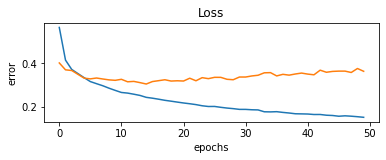

In [165]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(output1.history['loss'], label='train')
pyplot.plot(output1.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

Text(0, 0.5, 'accuracy')

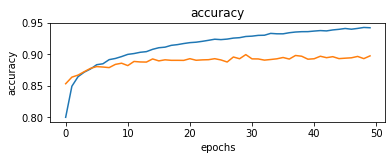

In [166]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('accuracy')
pyplot.plot(output1.history['accuracy'], label='train')
pyplot.plot(output1.history['val_accuracy'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('accuracy')

In [167]:
import math
class_names = {i:cn for i, cn in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }
def plot(images, labels, predictions=None):
    """Helper function to plot images, labels and predictions
    Parameters
    ----------
    images : 3D matrix of image
    labels : 1D array
    predictions (optional): 1D array
    """
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3, n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(f"lbl: {class_names[y_true]}")
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
        
        ax.set_xticks([])
        ax.set_yticks([])

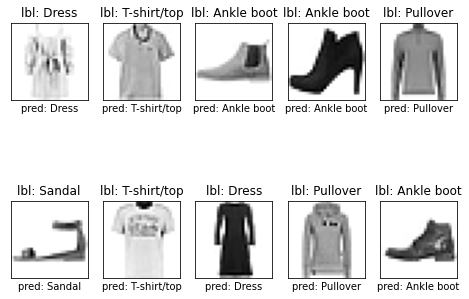

In [168]:
#predicting the model classes
preds = model1.predict_classes(testX)

# plot 10 random data
rand_idxs = np.random.permutation(len(testX))[:10]

plot(testX[rand_idxs], testY[rand_idxs], preds[rand_idxs])

In [169]:

#predicting the lables for test data 
n = 15
result = []
for i in range (n):
  results= model1.predict_classes(testX)[i]
  result.append(results)
  i=i+1
  if(i == n):
    break
print(result)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4]


In [170]:
y_pred = model1.predict_classes(testX)
print(y_pred)


[9 2 1 ... 8 1 5]


In [171]:

rounded_labels=np.argmax(testYn, axis=1)
rounded_labels[1]

2

In [172]:
#printinh the classification report
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.97      0.97      1000
           6       0.75      0.70      0.72      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



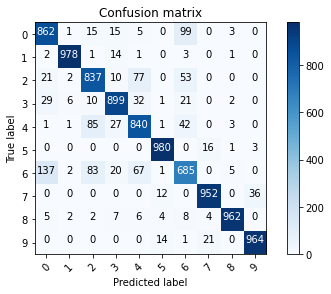

In [173]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# plot the confusion matrix
plot_confusion_matrix(conf_mat, classes=range(10))


In [174]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(rounded_labels, y_pred)